## 4.9 Data Visualization in Python

### This script contains the following points:

#### 1. Import data & Check dimensions
#### 2. Bar Charts
#### 3. Exporting Charts
#### 4. Histograms & Scatterplots
#### 5. Sampling Data
#### 6. Line Charts
#### 7. Export

### 01. Import data & Check dimensions

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create string path for main project folder

path = r'/Users/AngieUS/Desktop/Instacart Project'

# Import ords_prods_merge data (ords_prods_merge_agg.pkl data file from last task)

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_agg.pkl'))

# Check df

df.head()  

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,_merge,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_prices,spending_flag,median_days,order_freq_flag
0,2398795,1,2,3,7,15.0,196,1,1,Soda,...,both,Mid-range product,Least busy,Average orders,10,New customer,6.372222,Low Spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,10258,2,0,Pistachios,...,both,Low-range product,Least busy,Average orders,10,New customer,6.372222,Low Spender,20.5,Non-frequent customer
2,2398795,1,2,3,7,15.0,12427,3,1,Original Beef Jerky,...,both,Low-range product,Least busy,Average orders,10,New customer,6.372222,Low Spender,20.5,Non-frequent customer
3,2398795,1,2,3,7,15.0,13176,4,0,Bag of Organic Bananas,...,both,Mid-range product,Least busy,Average orders,10,New customer,6.372222,Low Spender,20.5,Non-frequent customer
4,2398795,1,2,3,7,15.0,26088,5,1,Aged White Cheddar Popcorn,...,both,Low-range product,Least busy,Average orders,10,New customer,6.372222,Low Spender,20.5,Non-frequent customer


In [3]:
# Display dimensions of df - rows, columns

df.shape

(30328763, 23)

### 02. Bar Charts

<Axes: xlabel='orders_day_of_week'>

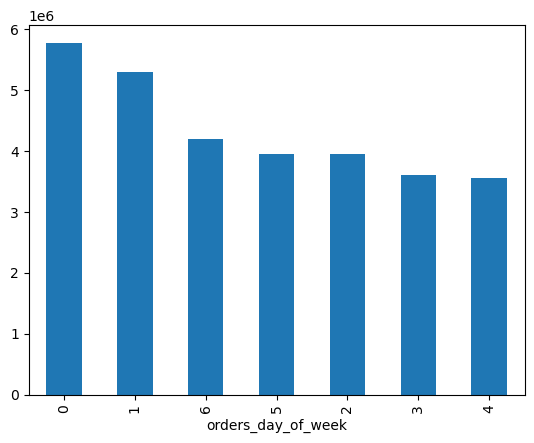

In [4]:
# Create bar chart for 'orders_day_of_week' column

df['orders_day_of_week'].value_counts().plot.bar()

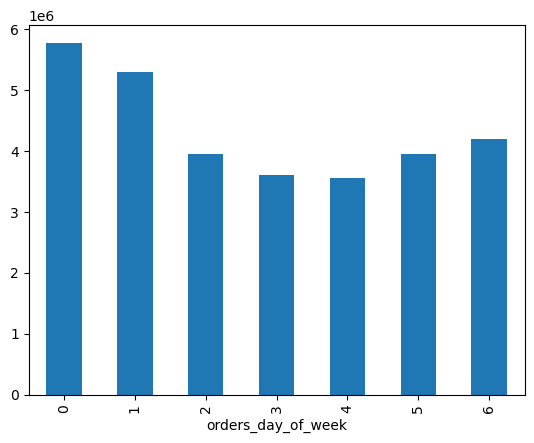

In [5]:
# Since the default order on the x-axis is descending, you can sort the order with:

bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [6]:
# This sort syntax works with frequency (value counts) as well:

df['orders_day_of_week'].value_counts()

orders_day_of_week
0    5779087
1    5303718
6    4190948
5    3952326
2    3947564
3    3600589
4    3554531
Name: count, dtype: int64

In [7]:
# Sort in value (day of week) order, not count order descending

df['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    5779087
1    5303718
2    3947564
3    3600589
4    3554531
5    3952326
6    4190948
Name: count, dtype: int64

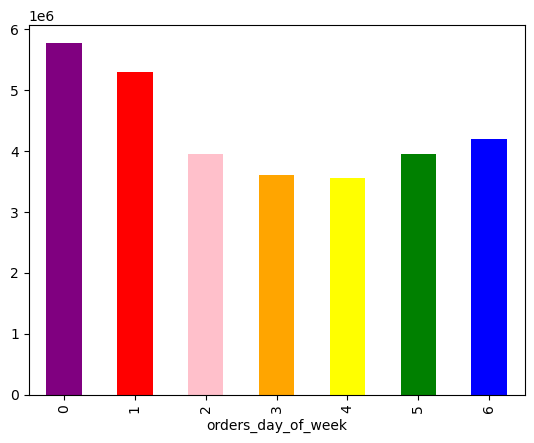

In [8]:
# Add colors to the bar chart

bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

### 03. Exporting Charts

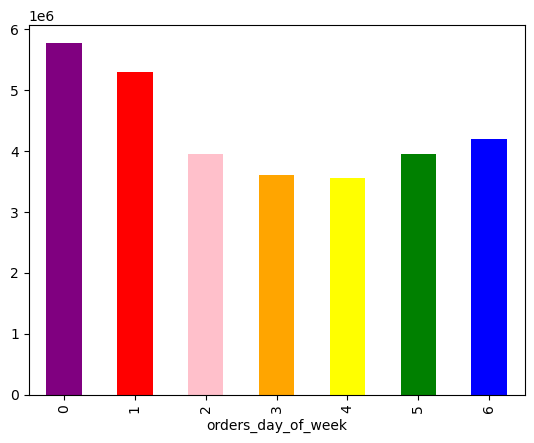

In [9]:
# Bar chart command assigned to Bar object in Jupyter

bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [13]:
# Bar chart command to export bar chart object (bar.figure) outside of Jupyter - figure.savefig() function

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### 04. Histograms & Scatterplots

<Axes: ylabel='Frequency'>

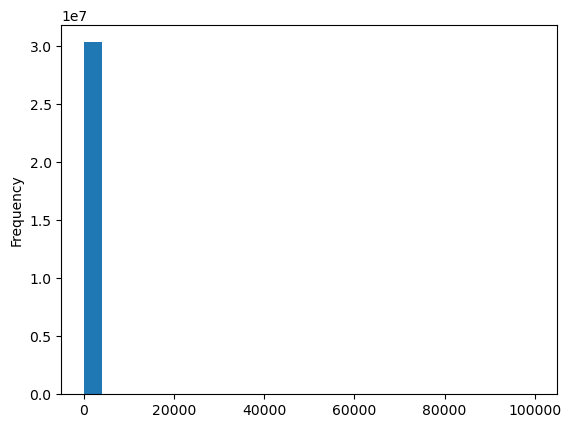

In [10]:
# Create a histogram for the 'prices' column (note: there are 656 records for 99999 and 4120 records for 14900)

df['prices'].plot.hist(bins = 25)

In [11]:
# Unexpected chart output - review descriptive analysis of 'prices' column

df['prices'].describe().round(2)

count    30328763.00
mean           11.98
std           496.37
min             1.00
25%             4.20
50%             7.40
75%            11.30
max         99999.00
Name: prices, dtype: float64

#### Max outlier of 99999 is breaking the chart. Use scatterplot to identify outliers.

<Axes: xlabel='prices', ylabel='prices'>

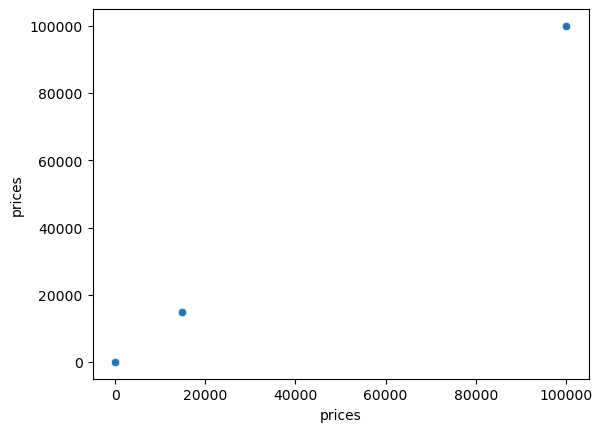

In [12]:
# Create a scatterplot for the 'prices' column

sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [13]:
# Tell pandas not to truncate columns
pd.set_option('display.max_columns', None)

In [14]:
# Display outlier records - use > 100 as threshold

df.loc[df['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_prices,spending_flag,median_days,order_freq_flag
1413,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Most orders,40,Regular customer,109.670103,High Spender,5.0,Frequent customer
1475,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Most orders,40,Regular customer,109.670103,High Spender,5.0,Frequent customer
15303,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Average orders,4,New customer,1250.245833,High Spender,12.0,Regular customer
15309,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Busiest day,Average orders,4,New customer,1250.245833,High Spender,12.0,Regular customer
50270,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Busiest day,Average orders,16,Regular customer,120.090909,High Spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30249828,1039454,205650,15,1,10,7.0,21553,6,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Busiest day,Most orders,25,Regular customer,358.255457,High Spender,6.0,Frequent customer
30249874,3172853,205650,18,1,9,7.0,21553,17,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Busiest day,Most orders,25,Regular customer,358.255457,High Spender,6.0,Frequent customer
30275410,2504315,205818,3,5,15,3.0,21553,13,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Most orders,25,Regular customer,173.751955,High Spender,13.0,Regular customer
30275420,1108388,205818,5,4,5,1.0,21553,5,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Least busy,Fewest orders,25,Regular customer,173.751955,High Spender,13.0,Regular customer


In [15]:
# Mark inconsistent values as missing (NaN)

df.loc[df['prices'] >100, 'prices'] = np.nan

In [16]:
# Check max() value for 'prices' now

df['prices'].max()

25.0

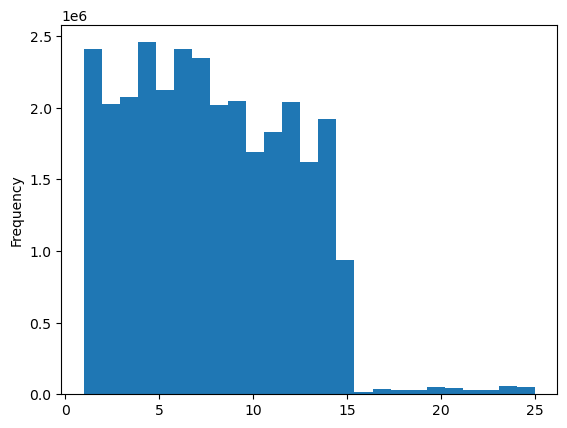

In [17]:
# Retry running histogram chart again

hist = df['prices'].plot.hist(bins = 25)

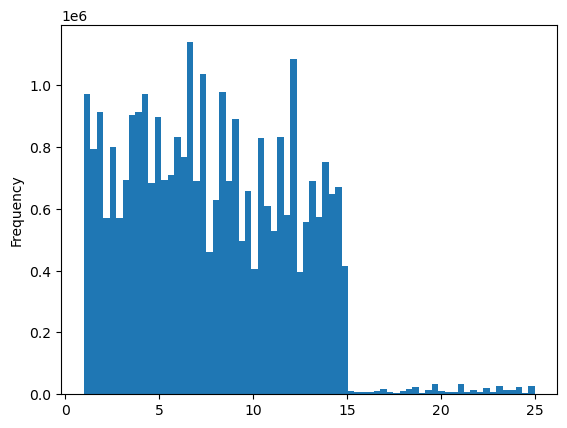

In [18]:
# Increase level of granularity to 70 for more, thinner columns

hist = df['prices'].plot.hist(bins = 70)

In [19]:
# Export histogram chart image

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

#### Check and Remove NaN records just labeled in prices

In [20]:
# Check missing records in pricing (NaN)

df_nan = df[df['prices'].isnull() == True]

df_nan

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_prices,spending_flag,median_days,order_freq_flag
1413,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,both,High-range product,Regularly busy,Most orders,40,Regular customer,109.670103,High Spender,5.0,Frequent customer
1475,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,both,High-range product,Regularly busy,Most orders,40,Regular customer,109.670103,High Spender,5.0,Frequent customer
15303,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,both,High-range product,Regularly busy,Average orders,4,New customer,1250.245833,High Spender,12.0,Regular customer
15309,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,both,High-range product,Busiest day,Average orders,4,New customer,1250.245833,High Spender,12.0,Regular customer
50270,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,both,High-range product,Busiest day,Average orders,16,Regular customer,120.090909,High Spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30249828,1039454,205650,15,1,10,7.0,21553,6,1,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,both,High-range product,Busiest day,Most orders,25,Regular customer,358.255457,High Spender,6.0,Frequent customer
30249874,3172853,205650,18,1,9,7.0,21553,17,1,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,both,High-range product,Busiest day,Most orders,25,Regular customer,358.255457,High Spender,6.0,Frequent customer
30275410,2504315,205818,3,5,15,3.0,21553,13,0,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,both,High-range product,Regularly busy,Most orders,25,Regular customer,173.751955,High Spender,13.0,Regular customer
30275420,1108388,205818,5,4,5,1.0,21553,5,1,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,both,High-range product,Least busy,Fewest orders,25,Regular customer,173.751955,High Spender,13.0,Regular customer


In [21]:
# Create new dataframe df_price_clean

df_price_clean = df[df['prices'].isnull() == False]

# Display dimensions of df_price_clean - rows, columns

df_price_clean.shape

(30323987, 23)

### 05. Sampling Data

In [22]:
# Create a sample subset to use for Line Chart computing
# Create a list holding True/False values 70/30

np.random.seed(4)
dev = np.random.rand(len(df_price_clean)) <= 0.7

In [23]:
# Store 70% of the sample in the dataframe big

big = df_price_clean[dev]

In [24]:
# Store 30% of the sample in the dataframe small

small = df_price_clean[~dev]

In [25]:
# Check dataframes

len(df_price_clean)

30323987

In [26]:
# Verify sample splits

len(big) + len(small)

30323987

In [27]:
# Optimize processing by reducing sample set to only those columns necessary for the chart - prices, orders_day_of_week

df_small = small[['orders_day_of_week','prices']]

### 06. Line Chart

/opt/anaconda3/envs/cfinstacart/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/cfinstacart/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


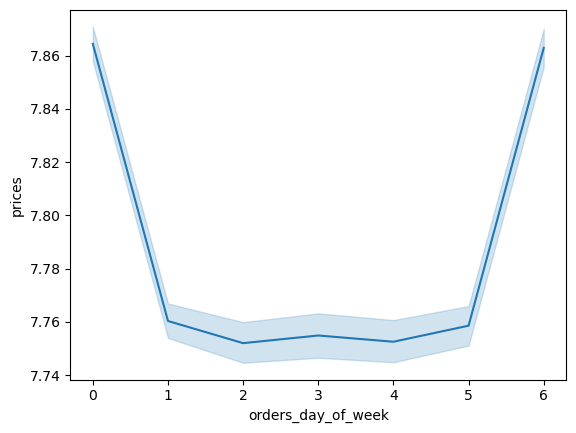

In [28]:
# Use sample data created - small set - df_small
# Create a line chart to show the development of the 'prices' column across the days of the week
# Plot the 'order_day_of-week' column on x-axis and 'prices' column on y-axis

line = sns.lineplot(data = df_small, x = 'orders_day_of_week',y = 'prices')

In [29]:
# Export line chart image

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_weekdays_prices.png'))

### 07. Export file

In [31]:
# Display dimension of df_price_clean

df_price_clean.shape

(30323987, 23)

In [33]:
# Export data (pkl file) as ords_prods_merge_agg

df_price_clean.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_merge_agg_cln.pkl'))